In [47]:
%%time
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

import pandas as pd
import ast

import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer

import matplotlib.pyplot as plt



CPU times: total: 0 ns
Wall time: 0 ns


### **Utils**

In [9]:
def convert_to_list(text):
    return ast.literal_eval(text)

In [12]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
file_path = os.path.join(parent_dir, 'data', 'processed', 'processed_cu_nlp.csv')

# Read the CSV file with converters for q1_tokens and q2_tokens
cu_nlp = pd.read_csv(file_path, converters={'q1_tokens': convert_to_list, 'q2_tokens': convert_to_list})
cu_nlp.head()

,Unnamed: 0,no,question1,question2,grade,lang,q1_tokens,q2_tokens
0,0,0,question ir-based following assume question qu...,using semantic analysis methods use vector spa...,25,en,"[question, ir-based, following, assume, questi...","[using, semantic, analysis, methods, use, vect..."
1,1,1,question ir-based following assume question qu...,use vector space model firstly binary mark eve...,25,en,"[question, ir-based, following, assume, questi...","[use, vector, space, model, firstly, binary, m..."
2,2,2,question ir-based following assume question qu...,assume question like sky blue calculate two wo...,50,en,"[question, ir-based, following, assume, questi...","[assume, question, like, sky, blue, calculate,..."
3,3,3,question ir-based following assume question qu...,use vector space model representation words ve...,25,en,"[question, ir-based, following, assume, questi...","[use, vector, space, model, representation, wo..."
4,4,4,question ir-based following assume question qu...,corpus use sentence segmenting seperate senten...,50,en,"[question, ir-based, following, assume, questi...","[corpus, use, sentence, segmenting, seperate, ..."


In [14]:
cu_nlp["q1_tokens"].iat[0]

['question',
 'ir-based',
 'following',
 'assume',
 'question',
 'query',
 'large',
 'text',
 'would',
 'segment',
 'texts',
 'shorter',
 'passages',
 'like',
 'paragraphs',
 'need',
 'find',
 'relevant',
 'texts',
 'corpus',
 'find',
 'relatedness',
 'would',
 'apply',
 'one',
 'methods',
 'tf-idf',
 'similarity',
 'jaccard',
 'index',
 'word',
 'embeddings',
 'etc',
 'query',
 'passages',
 'last',
 'need',
 'rank',
 'relevant',
 'passages',
 'find',
 'related',
 'sort',
 'passages',
 'according',
 '-',
 'number',
 'named',
 'entities',
 'right',
 'type',
 'passage',
 '-',
 'number',
 'question',
 'words',
 'keywords',
 'passage',
 '-',
 'keyword',
 'proximity',
 'question',
 'passage',
 '-',
 'number',
 'question',
 'n-grams',
 'also',
 'passage',
 '-',
 'number',
 'sequences',
 'question',
 'words',
 'occurring',
 'passages',
 'etc',
 'way',
 'find',
 'relevant',
 'text']

In [39]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel, AdamW

In [43]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [44]:
# Define the regression model
class BertRegressionModel(nn.Module):
    def __init__(self):
        super(BertRegressionModel, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        grade = self.linear(pooled_output)
        return grade

Epoch 1/5000, Train Loss: 80.68856674056869, Val Loss: 90.58601888020833
Epoch 2/5000, Train Loss: 78.08665672508445, Val Loss: 88.42159830729166
Epoch 3/5000, Train Loss: 76.28440238334038, Val Loss: 86.50288899739583
Epoch 4/5000, Train Loss: 74.82006945910754, Val Loss: 84.81963704427083
Epoch 5/5000, Train Loss: 73.55440596846847, Val Loss: 83.21988932291667
Epoch 6/5000, Train Loss: 72.38802165813274, Val Loss: 81.7935791015625
Epoch 7/5000, Train Loss: 71.36150298247466, Val Loss: 80.53971354166667
Epoch 8/5000, Train Loss: 70.38073070629223, Val Loss: 79.26941731770833
Epoch 9/5000, Train Loss: 69.36921623161247, Val Loss: 78.08619791666666
Epoch 10/5000, Train Loss: 68.3221056139147, Val Loss: 76.92374674479167
Epoch 11/5000, Train Loss: 67.41705047332489, Val Loss: 75.8578857421875
Epoch 12/5000, Train Loss: 66.49130221530123, Val Loss: 74.72838541666667
Epoch 13/5000, Train Loss: 65.58877206063485, Val Loss: 73.73663736979167
Epoch 14/5000, Train Loss: 64.79534472216356, Val 

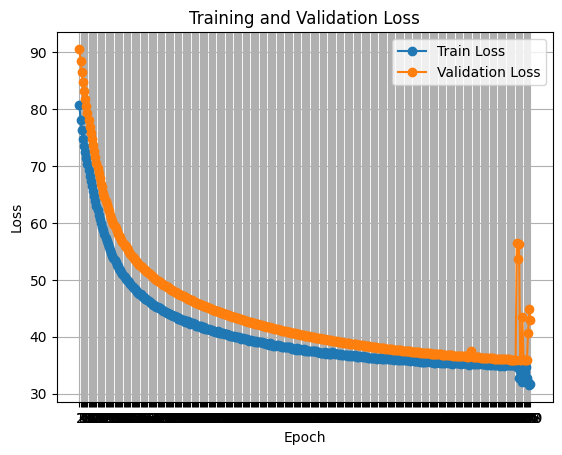

In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(input_ids, attention_masks, grades, test_size=test_ratio, random_state=42)
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(train_inputs, train_masks, train_labels, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# Define the regression model, loss function, and optimizer
model = BertRegressionModel()
criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=1e-5)

# Initialize an empty list to store the loss values
train_loss_values = []
val_loss_values = []

# Early stopping parameters
best_val_loss = float('inf')
patience = 5
counter = 0

# Train the regression model
num_epochs = 5000
batch_size = 16
for epoch in range(num_epochs):
    # Training loop
    model.train()
    epoch_train_loss = 0.0
    for i in range(0, len(train_inputs), batch_size):
        batch_inputs = train_inputs[i:i+batch_size]
        batch_masks = train_masks[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_inputs, batch_masks)
        loss = criterion(outputs.squeeze(), batch_labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()  # Accumulate batch loss

    epoch_train_loss /= len(train_inputs)  # Calculate average epoch loss
    train_loss_values.append(epoch_train_loss)  # Store average epoch loss

    # Validation loop
    model.eval()
    with torch.no_grad():
        epoch_val_loss = 0.0
        for i in range(0, len(val_inputs), batch_size):
            batch_inputs = val_inputs[i:i+batch_size]
            batch_masks = val_masks[i:i+batch_size]
            batch_labels = val_labels[i:i+batch_size]

            outputs = model(batch_inputs, batch_masks)
            loss = criterion(outputs.squeeze(), batch_labels)

            epoch_val_loss += loss.item()  # Accumulate batch loss

        epoch_val_loss /= len(val_inputs)  # Calculate average epoch loss
        val_loss_values.append(epoch_val_loss)  # Store average epoch loss

        # Check for early stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            counter = 0
            # Save the model
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            counter += 1

        if counter >= patience:
            print(f'Early stopping after {epoch+1} epochs.')
            break

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_train_loss}, Val Loss: {epoch_val_loss}")

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))



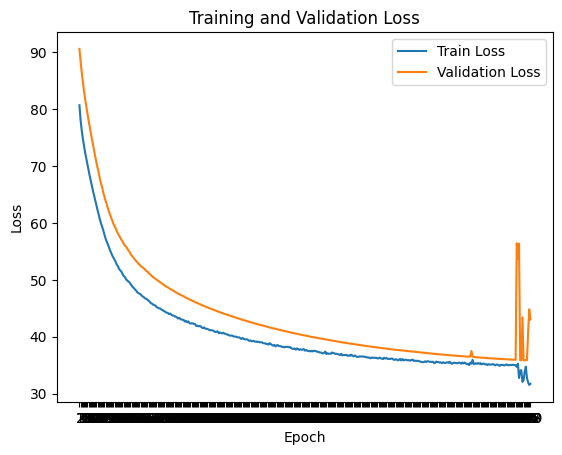

In [54]:
# Visualize the loss values
plt.plot(range(1, len(train_loss_values) + 1), train_loss_values, label='Train Loss')
plt.plot(range(1, len(val_loss_values) + 1), val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_loss_values) + 1))
plt.legend()
plt.show()

In [ ]:
model.save_pretrained("bert_asag_model")